In [70]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve

# Load Data and Data Clening

In [2]:
data = pd.read_csv('.\\conversion_data.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [5]:
data[data['age']>90]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


The max age is 123, and we search for the record whose age is greater then 90. It is less likely to have a person older than 90 with 10+ total-pages-visited. Without any other information, here we assume that this record could have some mistakes (maybe a typo), and will replace this two age by the median of this column.

In [3]:
data[data['age']>80]['age']=int(data.age.median())

In [20]:
data['country']

0              UK
1              US
2              US
3           China
4              US
5              US
6           China
7              US
8              UK
9              US
10             US
11             US
12          China
13             UK
14          China
15             US
16             US
17          China
18          China
19             US
20             US
21             UK
22             UK
23             US
24          China
25             US
26             US
27          China
28        Germany
29             US
           ...   
316170         US
316171         US
316172         US
316173         UK
316174      China
316175         UK
316176         US
316177         UK
316178         UK
316179         UK
316180         US
316181         US
316182         US
316183         US
316184         UK
316185      China
316186      China
316187      China
316188         US
316189      China
316190         US
316191         US
316192      China
316193         UK
316194    

# Data Exploration

In [38]:
cty_mean = data.groupby('country').mean()

Text(0.5,1,'Count Converted of Country')

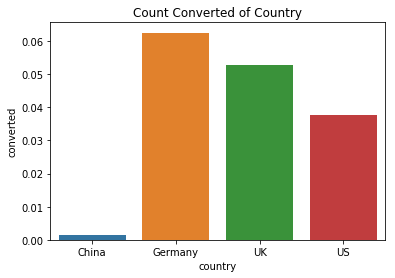

In [25]:
g = sns.barplot(x='country',y='converted', data=cty_mean['converted'].reset_index())
g.set_title('Count Converted of Country')

In [61]:
cty_cnt=data[['country','converted']].groupby('country').count()
cty_cnt=cty_cnt.reindex(['UK','US','China','Germany']).reset_index()

In [63]:
cty_cnt

,country,converted
0,UK,48450
1,US,178092
2,China,76602
3,Germany,13056


Text(0.5,1,'Count Converted of Country')

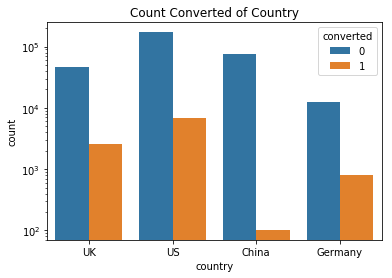

In [67]:
g = sns.countplot(x='country',hue='converted', data=data)
g.set_yscale('log')
g.set_title('Count Converted of Country')

We can see that the major market is the US market, and its conversion rate is high. However, the conversion rate of China is very low, even though the total visitor of China is high. The conversion rate of Germany is high, but meawhile the total visitor from Germany is low. 

Text(0.5,1,'Count Converted of Source')

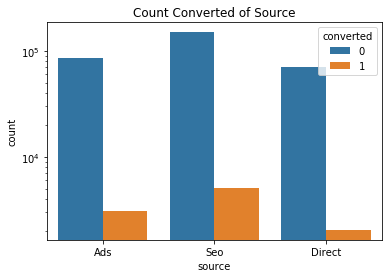

In [69]:
g = sns.countplot(x='source',hue='converted', data=data)
g.set_yscale('log')
g.set_title('Count Converted of Source')

It seems that SEO transfered the highest visiters and conversion rate.

In [19]:
age_mean = data[['age','converted']].groupby('age').mean().reset_index()

Text(0.5,1,'Converted Distribution of Age')

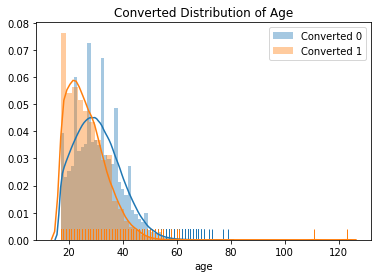

In [36]:
g=sns.distplot(data[data['converted']==0]['age'], label='Converted 0')
g=sns.distplot(data[data['converted']==1]['age'], label='Converted 1')
g.legend()
g.set_title('Converted Distribution of Age')

From above plot, we can see that the main customer group is approximately range from 20-30. Younger users seem to visit more and have higher conversion rate.

Text(0.5,1,'Converted Distribution of Total_pages_visited')

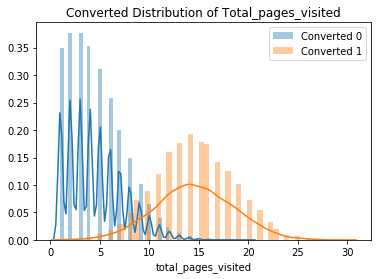

In [37]:
g=sns.distplot(data[data['converted']==0]['total_pages_visited'], label='Converted 0')
g=sns.distplot(data[data['converted']==1]['total_pages_visited'], label='Converted 1')
g.legend()
g.set_title('Converted Distribution of Total_pages_visited')

From above plot, we can see that the more time and effort a user spends, the more likely they will converte.

# Data Preprocessing

In [4]:
newdata = pd.get_dummies(data)

In [27]:
newdata.columns

Index(['age', 'new_user', 'total_pages_visited', 'converted', 'country_China',
       'country_Germany', 'country_UK', 'country_US', 'source_Ads',
       'source_Direct', 'source_Seo'],
      dtype='object')

In [30]:
features = normalize(np.array(newdata.drop('converted', axis=1)))
labels = np.array(newdata['converted']).ravel()
feature_names = ['age', 'new_user', 'total_pages_visited', 'converted', 'country_China',
       'country_Germany', 'country_UK', 'country_US', 'source_Ads',
       'source_Direct', 'source_Seo']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, labels,test_size=0.2, stratify = labels, random_state=23)

* First, we need to trasform the data. Since the data is nominal data, here we use one-hot-encoding. If there are too many features, we could use PCA, but in this case we do not have to for now;
* Second, we split the data into feature and label, training and testing;
* As the range of age is large, we need to normalize the features in the same scale 0-1. 

# Model Fitting & Feature Importance

In [29]:
clf_rf = RandomForestClassifier(criterion='gini', random_state=0)
clf_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
rf_impo=list(zip(feature_names,clf_rf.feature_importances_))
rf_impo=sorted(rf_impo, key=lambda x: x[1], reverse=True)
rf_impo=pd.DataFrame(rf_impo,columns=['features','scores'])

Text(0.5,1,'Feature Importance-Random Forest')

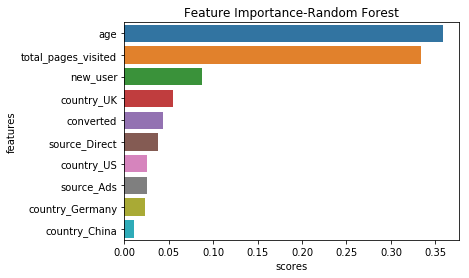

In [58]:
g = sns.barplot(x=rf_impo['scores'],y=rf_impo['features'], data=pd.DataFrame(rf_impo))
g.set_title('Feature Importance-Random Forest')

In [64]:
def pred_score(model):
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    model_score = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    return model_score.mean()

In [67]:
rf_score=pred_score(clf_rf)
rf_score

0.984543010752688

In [69]:
rf_pred = clf_rf.predict(x_test)

In [78]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred)

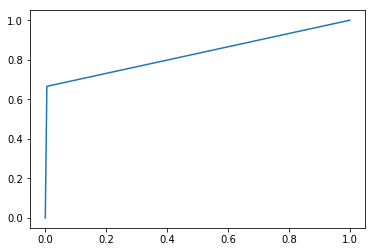

In [82]:
g = sns.lineplot(x=fpr_rf,y=tpr_rf)
#g.set_title('RUC Curve')

from above, we can draw below conclusion:
1. China has large visitor number, but the conversion rate is low. The market potential is huge, but the conversion rate need to be improved. It could be a problem of marketing and target user, or other objective issues. 
2. Germany ais the opposit side of China, it has great conversion rate but the total visitor number is low. As we lack of other data and information, we could first assume that our website and products sucessfully meet the need of Germany user but we need to expand the exploration and advertisement in the future.
3. the age and total-page-visit have the greatest influence to the conversion. The data implies the trend that younger visitor and those who visite more pages have higher probability to convert. So in the future, we need to target more on the youth market, and improve our websites which attract visitor to spend more time on.